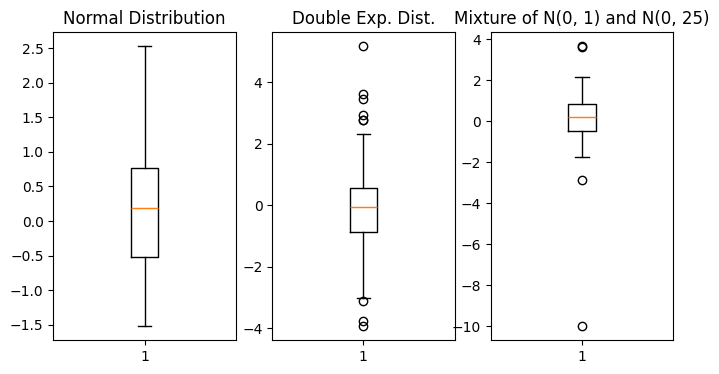

In [8]:
#--------------------------Q1---------------------------
import numpy as np
import matplotlib.pyplot as plt


# Generate random numbers for each distribution
normal_dist = np.random.normal(0, 1, 100)
double_exponential_dist = np.random.laplace(0, 1, 100)
mixture_dist = np.concatenate([np.random.normal(0, 1, 90), np.random.normal(0, 5, 10)])

plt.figure(figsize=(8,4))

plt.subplot(1, 3, 1)
plt.boxplot(normal_dist)
plt.title('Normal Distribution')

plt.subplot(1, 3, 2)
plt.boxplot(double_exponential_dist)
plt.title('Double Exp. Dist.')

plt.subplot(1, 3, 3)
plt.boxplot(mixture_dist)
plt.title('Mixture of N(0, 1) and N(0, 25)')

plt.show()


Standard Normal Distribution:
The box plot should show a symmetric distribution with a mean around 0.
The (IQR) is expected to be around 1.

Double Exponential Distribution:
This distribution has heavier tail compared to the normal distribution.
The box plot has more spread in the tail.

Mixture of N(0, 1) and N(0, 25):
The box plot has two clusters, one with a smaller spread (90% of the data from N(0, 1)) and another with a larger spread (10% of the data from N(0, 25)).

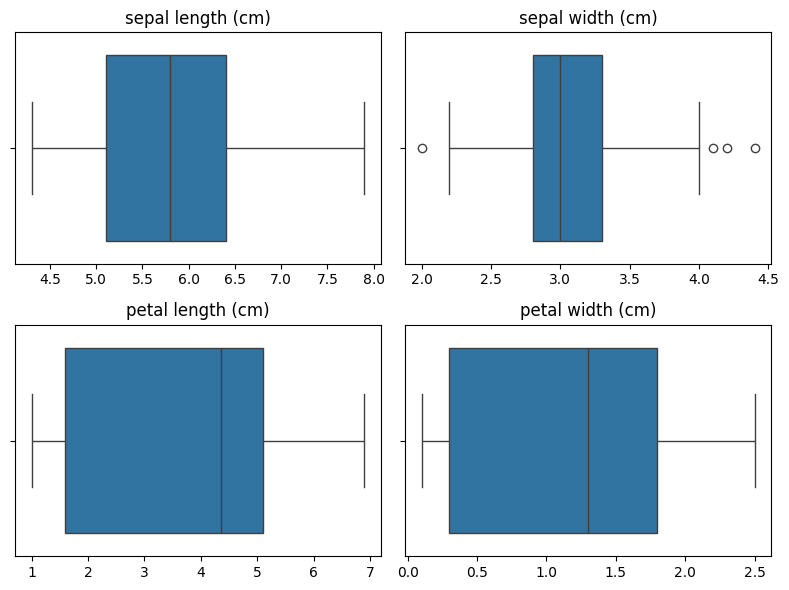

In [11]:
#--------------------------Q2---------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Create a box plot for each feature
plt.figure(figsize=(8,6))

for i in range(data.shape[1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[:, i])
    plt.title(feature_names[i])

plt.tight_layout()
plt.show()


Sepal Length :
Variance: Median lies about 5.7-5.8cm. Variance is moderate.
Outliers: there seems no outliers.

Sepal Width:
Variance: variance seems less as the box is not so wider, median sepal width is around 3cm.
Outliers: there are outliers in case of sepal width.

Petal Length:
Variance: There is a high variance in petal length. Median lies about 4-5cm, flowers tend to have petal length between 2 to 5cm.
Outliers: Outliers aren't much here.

Petal Width :
Variance: A wider box indicates higher variance, median petal width lies around 1.2-1.3cm.
Outliers: outliers are not much here.

0     60055.659970
1     61216.013942
2     60124.712832
3     61597.114622
4     62911.285409
5     63888.311215
6     65153.048956
7     63774.180357
8     66004.695227
9     67401.605906
10    68186.268927
11    66552.055043
12    68810.549974
13    69649.671308
14    68989.068486
15    70757.757825
dtype: float64


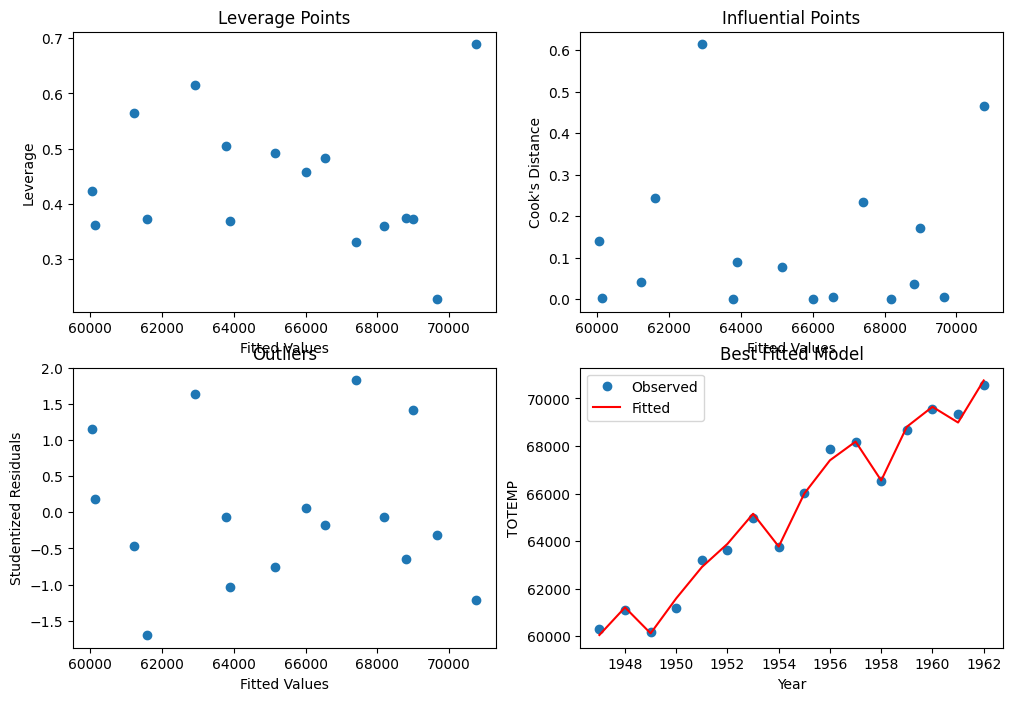

In [1]:
#------------------------------Q3-----------------------
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

longley = sm.datasets.longley.load_pandas().data
longley.to_csv("longley_dataset.csv", index=False)

X = sm.add_constant(longley.iloc[:, 1:])  
y = longley["TOTEMP"]
model = sm.OLS(y, X).fit()

print(model.fittedvalues)
influence = model.get_influence()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Leverage points
axes[0, 0].scatter(model.fittedvalues, influence.hat_matrix_diag, alpha=1)
axes[0, 0].set_title("Leverage Points")
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Leverage")

# Influential points
axes[0, 1].scatter(model.fittedvalues, influence.cooks_distance[0], alpha=1)
axes[0, 1].set_title("Influential Points")
axes[0, 1].set_xlabel("Fitted Values")
axes[0, 1].set_ylabel("Cook's Distance")

# Outliers
axes[1, 0].scatter(model.fittedvalues, influence.resid_studentized, alpha=1)

axes[1, 0].set_title("Outliers")
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("Studentized Residuals")

# Best-fitted model
axes[1, 1].plot(longley["YEAR"], y, 'o', label="Observed")
axes[1, 1].plot(longley["YEAR"], model.fittedvalues, 'r-', label="Fitted")
axes[1, 1].set_title("Best Fitted Model")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("TOTEMP")
axes[1, 1].legend()

plt.show()

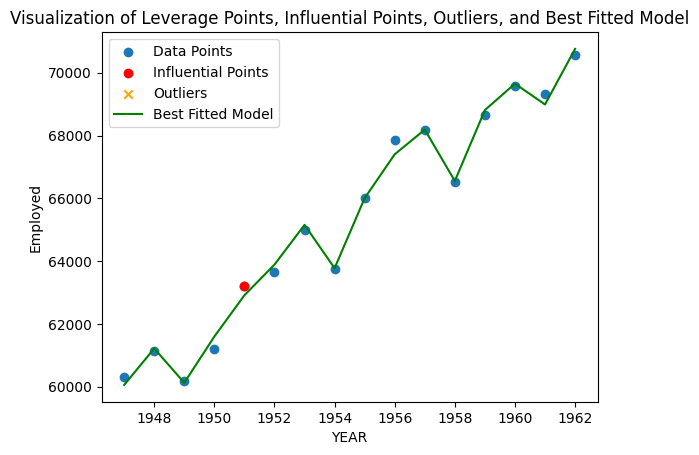

In [5]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model)
leverage = influence.hat_matrix_diag
residuals = influence.resid_studentized_internal
cook_distance = influence.cooks_distance[0]

# Set threshold for leverage and Cook's distance
leverage_threshold = 2 * (X.shape[1] + 1) / X.shape[0]
cook_distance_threshold = 4 / (X.shape[0] - X.shape[1] - 1)

# Identify influential points and outliers
influential_points = np.where((leverage > leverage_threshold) | (np.abs(cook_distance) > cook_distance_threshold))[0]
outliers = np.where(np.abs(residuals) > 3)[0]

# Plot the data points
plt.scatter(longley['YEAR'], y, label='Data Points')

# Highlight influential points, outliers, and best-fitted line
plt.scatter(longley.iloc[influential_points]['YEAR'], y.iloc[influential_points], color='red', marker='o', label='Influential Points')
plt.scatter(longley.iloc[outliers]['YEAR'], y.iloc[outliers], color='orange', marker='x', label='Outliers')
plt.plot(longley['YEAR'], model.fittedvalues, color='green', label='Best Fitted Model')

# Add labels and legend
plt.xlabel('YEAR')
plt.ylabel('Employed')
plt.legend()
plt.title('Visualization of Leverage Points, Influential Points, Outliers, and Best Fitted Model')

# Show the plot
plt.show()

In [50]:
#-------------------------Q4------------------------
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load California housing dataset
california_housing = fetch_california_housing()
X_california = california_housing.data
y_california = california_housing.target

# Load Boston housing dataset
boston = fetch_openml(name='boston', version=1)
X_boston = boston.data
y_boston = boston.target

# Split data for California housing dataset
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# Split data for Boston housing dataset
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Fit linear regression for California housing dataset
model_california = LinearRegression()
model_california.fit(X_train_california, y_train_california)

# Fit linear regression for Boston housing dataset
model_boston = LinearRegression()
model_boston.fit(X_train_boston, y_train_boston)
print(X_test_california)

[[   1.6812       25.            4.19220056 ...    3.87743733
    36.06       -119.01      ]
 [   2.5313       30.            5.03938356 ...    2.67979452
    35.14       -119.46      ]
 [   3.4801       52.            3.97715472 ...    1.36033229
    37.8        -122.44      ]
 ...
 [   9.2298       25.            7.23767606 ...    2.79049296
    37.31       -122.05      ]
 [   2.785        36.            5.28902954 ...    2.58860759
    36.77       -119.76      ]
 [   3.5521       17.            3.98883929 ...    3.72991071
    34.22       -118.37      ]]


Text(0.5, 1.0, 'California Housing Price Predictions')

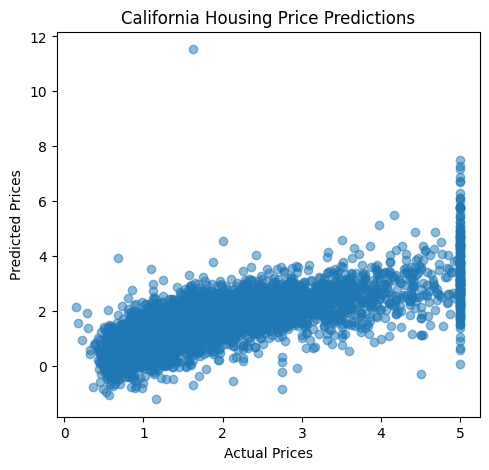

In [59]:
# Predictions for California housing dataset
y_pred_california = model_california.predict(list(map(np.int_,X_test_california)))

# Predictions for Boston housing dataset
#y_pred_boston = model_boston.predict(list(map(np.float_,(X_test_boston).astype(float))))

# Scatter plot for California housing dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_california, y_pred_california, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('California Housing Price Predictions')

# Scatter plot for Boston housing dataset
#plt.subplot(1, 2, 2)
#plt.scatter(y_test_boston, y_pred_boston, alpha=0.5)
#plt.xlabel('Actual Prices')
#plt.ylabel('Predicted Prices')

The x-axis represents the actual housing prices, and the y-axis represents the predicted prices. Ideally, the points should fall on a diagonal line, indicating that the predicted prices closely match the actual prices. We see some points deviate significantly from this line, thaat  shows discrepancies between the actual and predicted values.

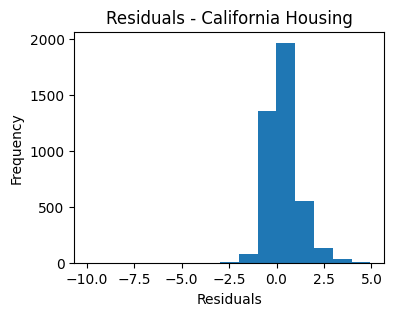

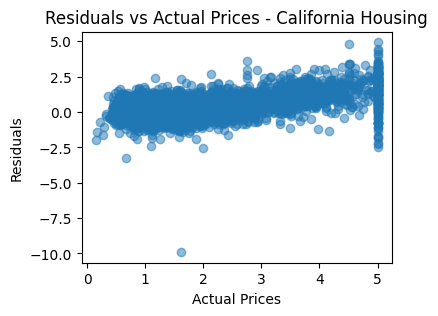

In [65]:

residuals_california = y_test_california - y_pred_california

plt.figure(figsize=(4,3))
plt.hist(residuals_california,bins=15)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals - California Housing')
plt.show()

# Scatter plot for residuals vs actual prices for California housing dataset
plt.figure(figsize=(4,3))
plt.scatter(y_test_california, residuals_california, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Prices - California Housing')
plt.show()


it is actually difficult to find out the outliers, since if we visualize graphically, we see that the points in scatter plot of the residuals have high residuals and so we cannot distinguish what can be the actual outliers that can be removed.